In [26]:
import pandas as pd
import matplotlib.pyplot as plt 
import seaborn as sns
import numpy as np 

In [27]:
df=pd.read_csv('campaign_responses.csv')

In [28]:
df.head()

,customer_id,age,gender,annual_income,credit_score,employed,marital_status,no_of_children,responded
0,1,35,Male,65000,720,Yes,Married,2,Yes
1,2,28,Female,45000,680,No,Single,0,No
2,3,42,Male,85000,750,Yes,Married,3,Yes
3,4,31,Female,55000,710,Yes,Single,1,No
4,5,47,Male,95000,790,Yes,Married,2,Yes


In [29]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 56 entries, 0 to 55
Data columns (total 9 columns):
 #   Column          Non-Null Count  Dtype 
---  ------          --------------  ----- 
 0   customer_id     56 non-null     int64 
 1   age             56 non-null     int64 
 2   gender          56 non-null     object
 3   annual_income   56 non-null     int64 
 4   credit_score    56 non-null     int64 
 5   employed        56 non-null     object
 6   marital_status  56 non-null     object
 7   no_of_children  56 non-null     int64 
 8   responded       56 non-null     object
dtypes: int64(5), object(4)
memory usage: 4.1+ KB


In [30]:
df.describe()

,customer_id,age,annual_income,credit_score,no_of_children
count,56.000000,56.000000,56.000000,56.000000,56.000000
mean,28.500000,36.214286,69017.857143,719.107143,1.285714
std,16.309506,7.088311,22784.756524,60.340753,1.186504
min,1.000000,25.000000,35000.000000,600.000000,0.000000
25%,14.750000,30.000000,48000.000000,677.500000,0.000000
50%,28.500000,35.500000,64500.000000,720.000000,1.000000
75%,42.250000,42.000000,90000.000000,770.000000,2.000000
max,56.000000,51.000000,110000.000000,820.000000,3.000000


In [31]:
df.shape

(56, 9)

In [32]:
df.isnull().sum()

customer_id       0
age               0
gender            0
annual_income     0
credit_score      0
employed          0
marital_status    0
no_of_children    0
responded         0
dtype: int64

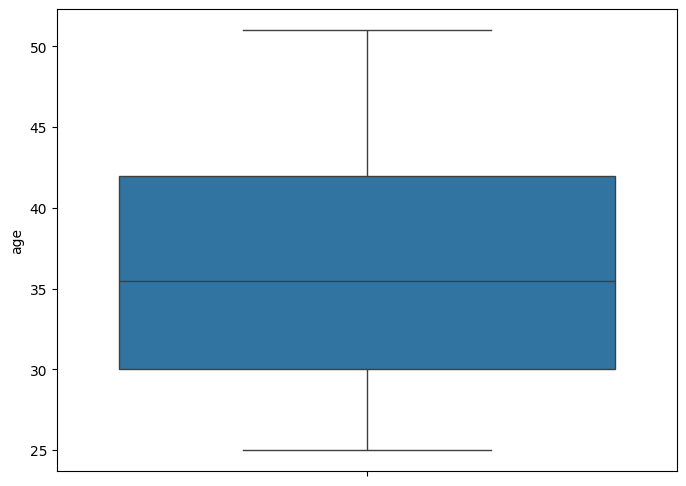

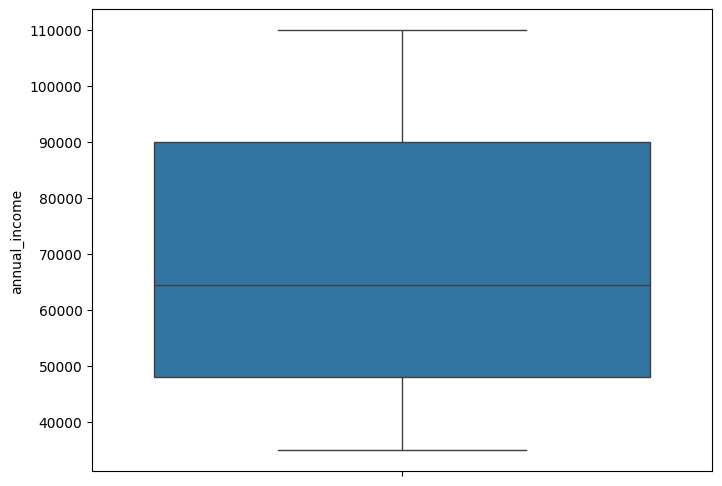

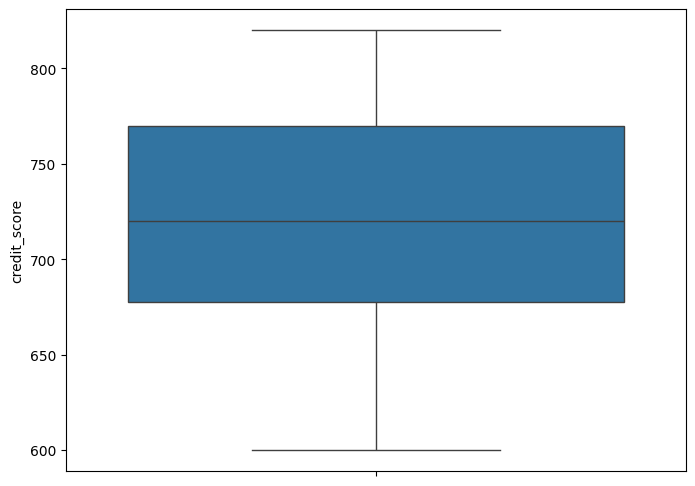

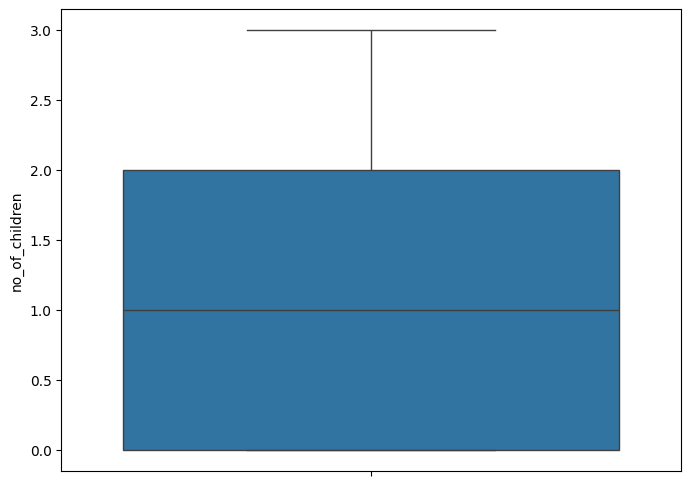

In [33]:
plt.figure(figsize=(8,6))
sns.boxplot(df['age'])
plt.show()

plt.figure(figsize=(8,6))
sns.boxplot(df['annual_income'])
plt.show()

plt.figure(figsize=(8,6))
sns.boxplot(df['credit_score'])
plt.show()

plt.figure(figsize=(8,6))
sns.boxplot(df['no_of_children'])
plt.show()

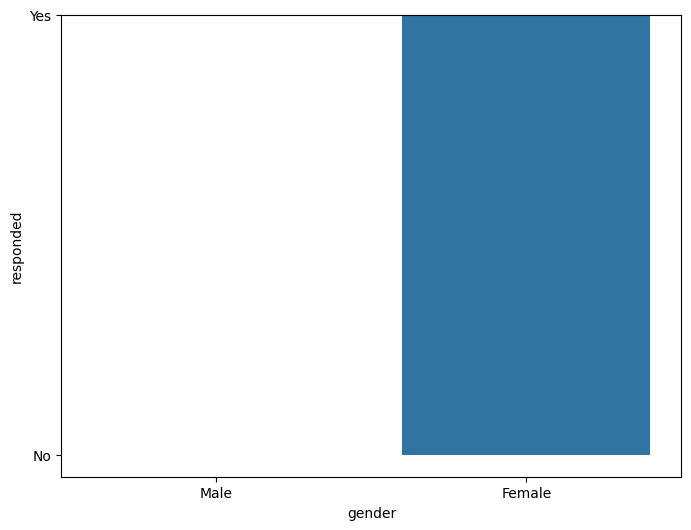

In [34]:
plt.figure(figsize=(8,6))
sns.barplot(x=df['gender'],y=df['responded'])
plt.show()

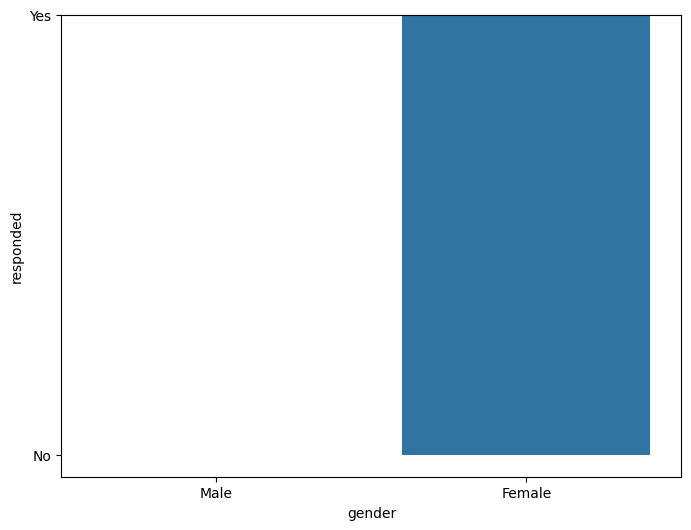

In [35]:
plt.figure(figsize=(8,6))
sns.barplot(x=df['gender'],y=df['responded'])
plt.show()

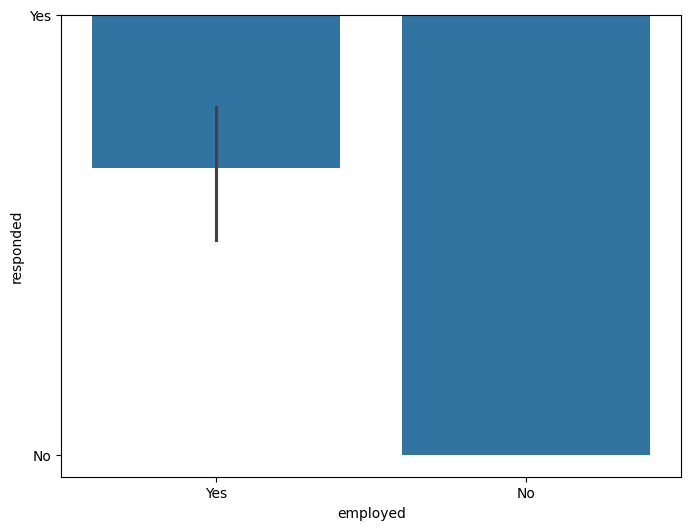

In [36]:
plt.figure(figsize=(8,6))
sns.barplot(x=df['employed'],y=df['responded'])
plt.show()

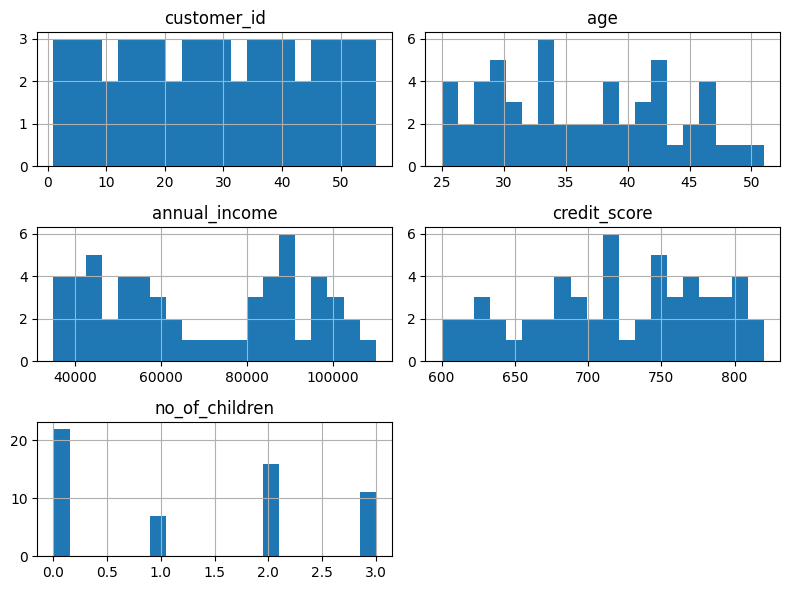

In [37]:
df.hist(bins=20,figsize=(8,6))
plt.tight_layout()

In [38]:
from scipy.stats import skew
skewed_values=df[['age','annual_income','credit_score','no_of_children']].apply(skew)
print(skewed_values)

age               0.204558
annual_income     0.112038
credit_score     -0.235200
no_of_children    0.157356
dtype: float64


In [39]:
df=pd.get_dummies(df,columns=['gender','employed','responded','marital_status'],drop_first=True)

In [40]:
df=df.astype(int)
df.head()

,customer_id,age,annual_income,credit_score,no_of_children,gender_Male,employed_Yes,responded_Yes,marital_status_Single
0,1,35,65000,720,2,1,1,1,0
1,2,28,45000,680,0,0,0,0,1
2,3,42,85000,750,3,1,1,1,0
3,4,31,55000,710,1,0,1,0,1
4,5,47,95000,790,2,1,1,1,0


In [41]:
from sklearn.preprocessing import StandardScaler

scaler=StandardScaler()

df_scaled=df.copy()
df_scaled[['age','annual_income','credit_score','no_of_children']]=scaler.fit_transform(df_scaled[['age','annual_income','credit_score','no_of_children']])
df_scaled.head()

,customer_id,age,annual_income,credit_score,no_of_children,gender_Male,employed_Yes,responded_Yes,marital_status_Single
0,1,-0.172859,-0.177936,0.014931,0.607457,1,1,1,0
1,2,-1.169337,-1.063659,-0.653970,-1.093422,0,0,0,1
2,3,0.823620,0.707788,0.516607,1.457896,1,1,1,0
3,4,-0.742275,-0.620797,-0.152294,-0.242983,0,1,0,1
4,5,1.535390,1.150650,1.185508,0.607457,1,1,1,0


In [42]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score,confusion_matrix,classification_report

x=df_scaled[['age','annual_income','credit_score','no_of_children','gender_Male','employed_Yes','marital_status_Single']]
y=df_scaled['responded_Yes']
X_train,X_test,y_train,y_test=train_test_split(x,y,test_size=0.2,random_state=42)

In [43]:
lr=LogisticRegression()
lr.fit(X_train,y_train)

y_pred1=lr.predict(X_test)

accuracy=accuracy_score(y_test,y_pred1)
cm=confusion_matrix(y_test,y_pred1)
cr=classification_report(y_test,y_pred1)

print('accuracy:',accuracy)
print('confusion matrix:',cm)
print('classification_report',cr)

accuracy: 1.0
confusion matrix: [[5 0]
 [0 7]]
classification_report               precision    recall  f1-score   support

           0       1.00      1.00      1.00         5
           1       1.00      1.00      1.00         7

    accuracy                           1.00        12
   macro avg       1.00      1.00      1.00        12
weighted avg       1.00      1.00      1.00        12



In [44]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier,AdaBoostClassifier,GradientBoostingClassifier

dt=DecisionTreeClassifier(random_state=42,max_depth=None,min_impurity_decrease=0)
dt.fit(X_train,y_train)

y_pred2=dt.predict(X_test)

accuracy=accuracy_score(y_test,y_pred2)
cm=confusion_matrix(y_test,y_pred2)
cr=classification_report(y_test,y_pred2)

print('accuracy:',accuracy)
print('confusion matrix:',cm)
print('classification_report',cr)

accuracy: 1.0
confusion matrix: [[5 0]
 [0 7]]
classification_report               precision    recall  f1-score   support

           0       1.00      1.00      1.00         5
           1       1.00      1.00      1.00         7

    accuracy                           1.00        12
   macro avg       1.00      1.00      1.00        12
weighted avg       1.00      1.00      1.00        12



In [45]:
rf=RandomForestClassifier(random_state=42,max_depth=None,min_impurity_decrease=0)
rf.fit(X_train,y_train)

y_pred3=rf.predict(X_test)

accuracy=accuracy_score(y_test,y_pred3)
cm=confusion_matrix(y_test,y_pred3)
cr=classification_report(y_test,y_pred3)

print('accuracy:',accuracy)
print('confusion matrix:',cm)
print('classification_report',cr)

accuracy: 0.9166666666666666
confusion matrix: [[5 0]
 [1 6]]
classification_report               precision    recall  f1-score   support

           0       0.83      1.00      0.91         5
           1       1.00      0.86      0.92         7

    accuracy                           0.92        12
   macro avg       0.92      0.93      0.92        12
weighted avg       0.93      0.92      0.92        12



In [46]:
ab=AdaBoostClassifier()
ab.fit(X_train,y_train)

y_pred4=ab.predict(X_test)

accuracy=accuracy_score(y_test,y_pred4)
cm=confusion_matrix(y_test,y_pred4)
cr=classification_report(y_test,y_pred4)

print('accuracy:',accuracy)
print('confusion matrix:',cm)
print('classification_report',cr)

accuracy: 1.0
confusion matrix: [[5 0]
 [0 7]]
classification_report               precision    recall  f1-score   support

           0       1.00      1.00      1.00         5
           1       1.00      1.00      1.00         7

    accuracy                           1.00        12
   macro avg       1.00      1.00      1.00        12
weighted avg       1.00      1.00      1.00        12



C:\Users\smits\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\ensemble\_weight_boosting.py:527: FutureWarning: The SAMME.R algorithm (the default) is deprecated and will be removed in 1.6. Use the SAMME algorithm to circumvent this warning.
  warnings.warn(


In [47]:
gb=GradientBoostingClassifier()
gb.fit(X_train,y_train)

y_pred5=gb.predict(X_test)

accuracy=accuracy_score(y_test,y_pred5)
cm=confusion_matrix(y_test,y_pred5)
cr=classification_report(y_test,y_pred5)

print('accuracy:',accuracy)
print('confusion matrix:',cm)
print('classification_report',cr)

accuracy: 1.0
confusion matrix: [[5 0]
 [0 7]]
classification_report               precision    recall  f1-score   support

           0       1.00      1.00      1.00         5
           1       1.00      1.00      1.00         7

    accuracy                           1.00        12
   macro avg       1.00      1.00      1.00        12
weighted avg       1.00      1.00      1.00        12



In [51]:
from sklearn.linear_model import Lasso
from sklearn.metrics import confusion_matrix, accuracy_score

# Training the Lasso model
lasso_model = Lasso(alpha=0.1)  # Adjust alpha as needed
lasso_model.fit(X_train, y_train)

# Predicting on the test set
y_pred_lasso = lasso_model.predict(X_test)

# Converting continuous predictions into binary predictions (threshold-based)
threshold = 0.5  # You can choose an appropriate threshold
y_pred_binary = (y_pred_lasso >= threshold).astype(int)

# Calculating confusion matrix and accuracy
confusion = confusion_matrix(y_test, y_pred_binary)
accuracy = accuracy_score(y_test, y_pred_binary)

# Printing results
print("Confusion Matrix:\n", confusion)
print("Accuracy:", accuracy)


Confusion Matrix:
 [[5 0]
 [1 6]]
Accuracy: 0.9166666666666666
